In [1]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1, cache=True,parser='auto')

X, y = mnist["data"], mnist["target"]

X=X.astype('float64')
y=y.astype('int')


In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [3]:
X=np.array(X_scaled)
y=np.array(y)


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42,test_size=0.1)

In [5]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(multi_class="multinomial",solver="lbfgs", random_state=42,max_iter=1000,)
log_clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [75]:
from sklearn.metrics import accuracy_score ,classification_report
y_pred = log_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9151428571428571


In [76]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.96      0.96       683
           1       0.94      0.97      0.96       800
           2       0.90      0.88      0.89       674
           3       0.89      0.90      0.89       760
           4       0.91      0.92      0.92       611
           5       0.88      0.87      0.88       658
           6       0.92      0.95      0.94       677
           7       0.92      0.94      0.93       724
           8       0.90      0.84      0.87       693
           9       0.91      0.91      0.91       720

    accuracy                           0.92      7000
   macro avg       0.91      0.91      0.91      7000
weighted avg       0.91      0.92      0.91      7000



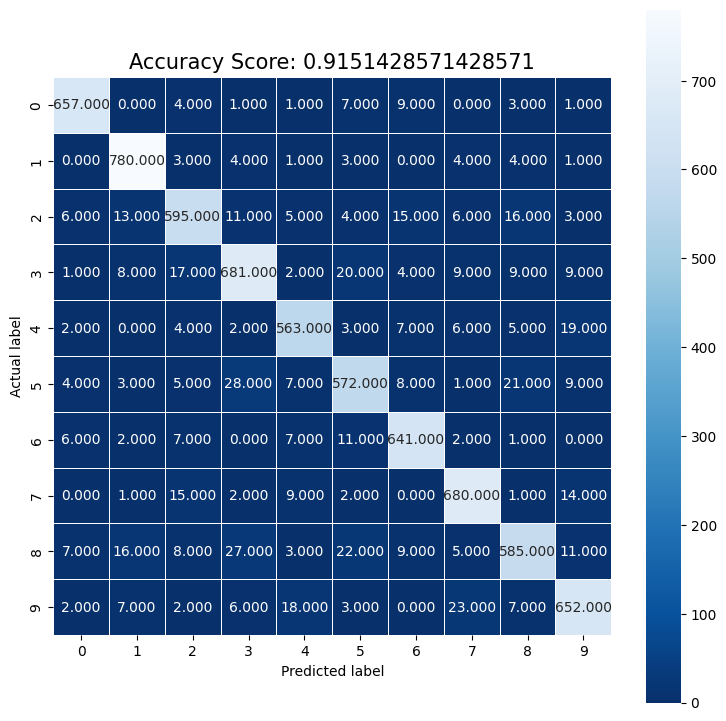

In [9]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 15)
plt.savefig('LogisticRegressionConfusionMatrix.png')
plt.show()


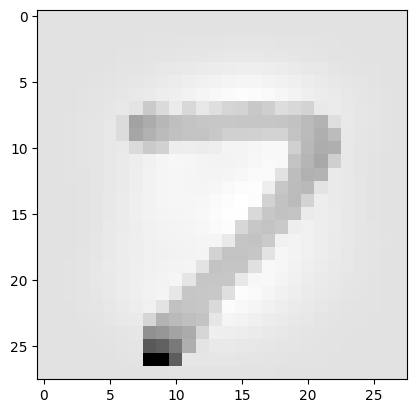

[7]


In [74]:
import matplotlib.pyplot as plt
digit=X_test[90]
digit_image = digit.reshape(28, 28)
plt.imshow(digit_image, cmap = plt.cm.binary, interpolation="nearest")
plt.show()
print(log_clf.predict(digit.reshape(1,784)))